# Epidemiological Model Assignment - Parameter exploration

Understanding disease dynamics
Overview

Duration: 3-5 hours
Group size: 3-4 students
Format: Jupyter Notebook
Assessment: Repository setup (5%), Code quality (30%), Documentation (25%), Results interpretation (40%)

This assignment focuses on systematic parameter exploration to understand how different factors affect epidemic outcomes.

Setup and submission format
Jupyter notebook structure

Your submission should be a single notebook with the following sections:

- **Setup & Imports** (provided starter code)  
- **Part 1:** Parameter Analysis Function  
- **Part 2:** Scenario Comparison  
- **Part 3:** Policy Recommendations  
- **Conclusions** 


Setup & Imports (provided starter code) 
Required Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint
import seaborn as sns

# Assignment Task: Recovery Rate Investigation

Using the **SIRD model** from your practical as a starting point, you will investigate how the **recovery rate** affects epidemic outcomes.

---

## Part 1: Parameter Analysis Function (50 points)

### Task  
Create a function called `analyze_recovery_rates()` that systematically explores different recovery rates.

### 1.1 Function Implementation  
Create a **well-documented function** with the following signature:


In [5]:
def sird_model(y, t, beta, gamma, mu):
    S,I,R,D= y
    N = S+I+R+D
    dSdt = -beta * S * I / N
    dIdt = (beta * S * I / N - gamma * I) - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

def run_sird_simulation(beta, gamma, mu, N=1000, I0=10, days=150):
    S0 = N - I0
    R0 = 0
    D0 = 0
    y0 = [S0, I0, R0, D0]

    t = np.linspace(0, days, days)
    sol = odeint(sird_model,  y0, t, args=(beta, gamma, mu))
    S, I, R, D = sol.T

    return t,S,I,R,D


def analyze_recovery_rates(beta, mu, N, I0, simulation_days):
    """
    Analyze epidemic outcomes for different recovery rates.

    Parameters:
    -----------
    beta : float
        Transmission rate
    mu : float  
        Mortality rate
    N : int
        Total population
    I0 : int
        Initial infected individuals
    simulation_days : int
        Simulation duration in days

    Returns:
    --------
    pandas.DataFrame
        Results summary for each recovery rate
    """
    # Your implementation here

    gamma_values = [0.05, 0.1, 0.15, 0.2, 0.25]
    res=[]
    for gamma in gamma_values:
        t,S,I,R,D = run_sird_simulation(beta, gamma, mu, N, I0, simulation_days)
        peak_infected=int(np.max(I))
        peak_day=int(np.argmax(I))
        total_deaths=int(D[-1])
        R0=beta/gamma

        res.append({
            "gamma" :gamma,
            "R0": R0,
            "peak_infected": peak_infected,
            "peak_day": peak_day,
            "total_deaths": total_deaths
            
        })
    return pd.DataFrame(res)



In [6]:
df =analyze_recovery_rates(beta=0.3, mu=0.01, N =1000, I0=10, simulation_days=150 )
print(df)

   gamma   R0  peak_infected  peak_day  total_deaths
0   0.05  6.0            479        25           165
1   0.10  3.0            269        27            83
2   0.15  2.0            136        30            47
3   0.20  1.5             57        33            26
4   0.25  1.2             18        29            11


---

### 1.2 Requirements  

- Test recovery rates:  
  `gamma_values = [0.05, 0.1, 0.15, 0.2, 0.25]`  

- For each γ value, calculate:  
  - Peak number of infectious individuals  
  - Day when peak occurs  
  - Total deaths at end of simulation  
  - Basic reproduction number *(R₀ = β/γ)*  

- Return results as a **formatted pandas DataFrame**  

- Generate a **publication-quality plot** showing all epidemic curves  

---

### 1.3 Expected Output Format  

Your function should produce:  

1. A **DataFrame** with columns:  
['gamma', 'R0', 'peak_infected', 'peak_day', 'total_deaths']

2. A **matplotlib figure** with:  
- Properly labeled axes  
- Legend  
- Title  


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

def analyze_recovery_plot(beta=None, mu=None, N=1000, I0=10, simulation_days=150,
                          beta_values=None, mu_values=None, gamma_values=None,
                          plot_compartments=("I",)):
    """
    Analyze SIRD outcomes over grids of (beta, mu, gamma) and produce:
      1) results DataFrame
      2) publication-quality matplotlib Figure comparing epidemic curves.

    Parameters
    ----------
    beta : float | None
        Single transmission rate (used if beta_values is None).
    mu : float | None
        Single mortality rate (used if mu_values is None).
    N : int, default 1000
        Total population size.
    I0 : int, default 10
        Initial infected.
    simulation_days : int, default 150
        Number of simulated days.
    beta_values : list[float] | None
        List of transmission rates to test. If None, falls back to [beta].
    mu_values : list[float] | None
        List of mortality rates to test. If None, falls back to [mu].
    gamma_values : list[float] | None
        List of recovery rates to test. Defaults to [0.05, 0.1, 0.15, 0.2, 0.25] if None.
    plot_compartments : tuple[str], default ("I",)
        Any subset of {"S","I","R","D"}.
        - ("I",) plots a single panel (cleanest comparison).
        - ("S","I","R","D") produces a 2x2 grid.

    Returns
    -------
    results_df : pandas.DataFrame
        Columns: ['beta','gamma','mu','R0','peak_infected','peak_day','total_deaths']
    fig : matplotlib.figure.Figure
        Figure with properly labeled axes, legend, and title.
    """
    # Defaults / coercion to lists
    if gamma_values is None:
        gamma_values = [0.05, 0.1, 0.15, 0.2, 0.25]
    if beta_values is None:
        if beta is None:
            raise ValueError("Provide either `beta` or `beta_values`.")
        beta_values = [beta]
    if mu_values is None:
        if mu is None:
            raise ValueError("Provide either `mu` or `mu_values`.")
        mu_values = [mu]

    # Storage
    records = []
    series = {}  # key: (beta, gamma, mu) -> (t, S, I, R, D)

    # Run all combinations
    for b, g, m in product(beta_values, gamma_values, mu_values):
        t, S, I, R, D = run_sird_simulation(b, g, m, N=N, I0=I0, days=simulation_days)

        peak_infected = int(np.max(I))
        peak_day = int(t[np.argmax(I)])
        total_deaths = int(D[-1])
        R0 = b / g

        records.append({
            "beta": b,
            "gamma": g,
            "mu": m,
            "R0": R0,
            "peak_infected": peak_infected,
            "peak_day": peak_day,
            "total_deaths": total_deaths
        })
        series[(b, g, m)] = (t, S, I, R, D)

    results_df = (
        pd.DataFrame(records)
        .sort_values(["beta", "gamma", "mu"])
        .reset_index(drop=True)
    )

    # --- plotting ---
    comps = [c for c in ("S", "I", "R", "D") if c in plot_compartments]
    one_panel = (len(comps) == 1)

    if one_panel:
        fig, ax = plt.subplots(figsize=(9, 5.5), dpi=150)
        comp = comps[0]
        for (b, g, m), (t, S, I, R, D) in series.items():
            y = {"S": S, "I": I, "R": R, "D": D}[comp]
            ax.plot(t, y, lw=2, label=f"β={b:.2f}, γ={g:.2f}, μ={m:.3f} (R₀={b/g:.2f})")
        ax.set_xlabel("Day")
        ax.set_ylabel(comp)
        ax.set_title(f"{comp}(t) across β, γ, μ combinations")
        ax.grid(True, alpha=0.3)
        # Make legend readable across many combos
        ax.legend(title="Scenarios", frameon=False, ncol=2 if len(series) <= 8 else 3, fontsize=8)
        fig.tight_layout()
    else:
        fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=150)
        ax_map = {"S": axs[0,0], "I": axs[0,1], "R": axs[1,0], "D": axs[1,1]}
        for comp in comps:
            ax = ax_map[comp]
            for (b, g, m), (t, S, I, R, D) in series.items():
                y = {"S": S, "I": I, "R": R, "D": D}[comp]
                ax.plot(t, y, lw=2, label=f"β={b:.2f}, γ={g:.2f}, μ={m:.3f} (R₀={b/g:.2f})")
            ax.set_xlabel("Day")
            ax.set_ylabel(comp)
            ax.set_title(f"{comp}(t)")
            ax.grid(True, alpha=0.3)

        # Single legend at top
        handles, labels = ax_map[comps[0]].get_legend_handles_labels()
        fig.legend(handles, labels, loc="upper center",
                   ncol=3 if len(labels) > 8 else 2, frameon=False, fontsize=8)
        fig.tight_layout(rect=[0, 0, 1, 0.95])

    return results_df, fig


## DISCLAIMER: USE OF GENERATIVE AI
# The function above was partially developed with the assistance of ChatGPT-5


,beta,gamma,mu,R0,peak_infected,peak_day,total_deaths
0,0.2,0.15,0.005,1.333333,31,67,13
1,0.2,0.15,0.020,1.333333,16,69,35
2,0.4,0.15,0.005,2.666667,246,23,29
3,0.4,0.15,0.020,2.666667,213,24,102


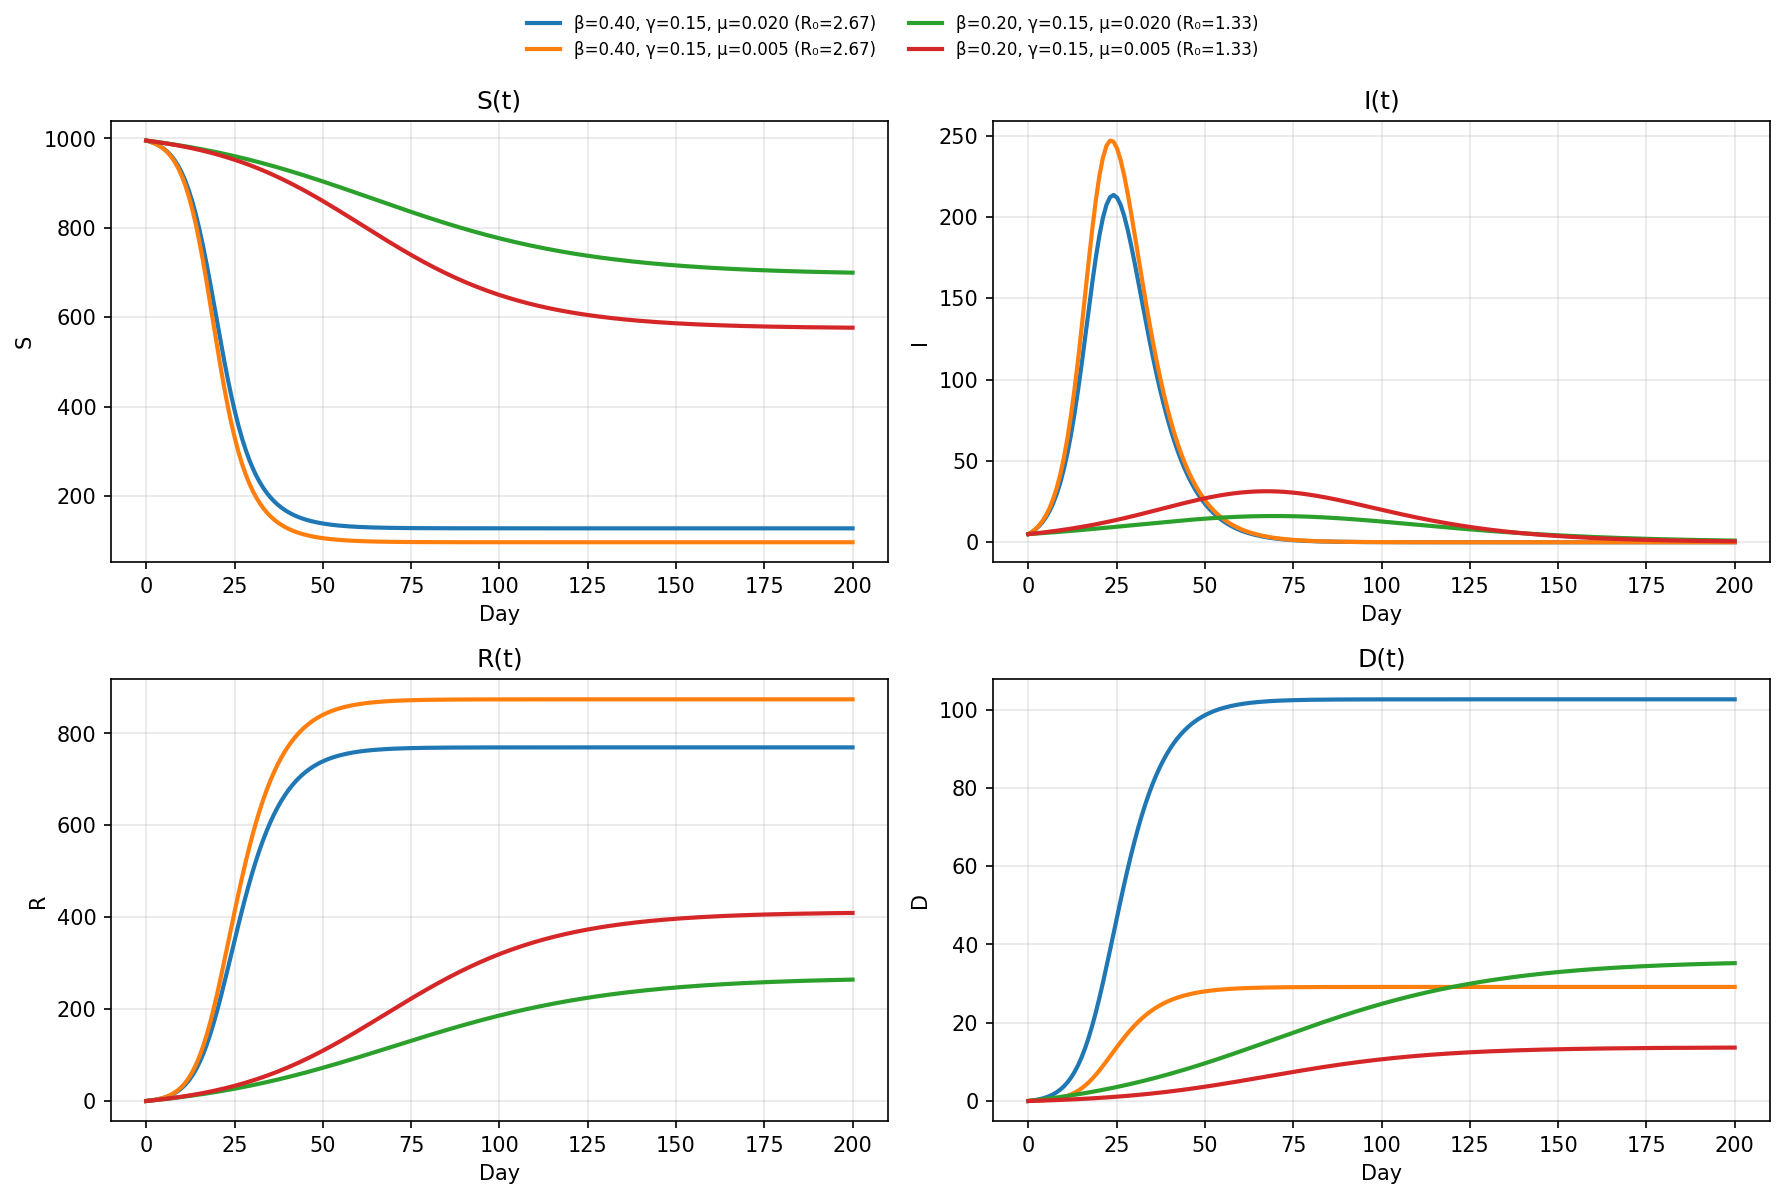

In [ ]:
"""
THIS HOW YOU USE IT BTW
"""

df, fig = analyze_recovery_plot(
    beta_values=[0.4, 0.2],
    mu_values=[0.02, 0.005],
    N=1000, I0=5, simulation_days=200,
    gamma_values=[0.15],
    plot_compartments=("S", "I", "R", "D")   # focus on infectious curves
)
df



## Part 2: Scenario Comparison (30 points)

---

### 2.1 Scenario Analysis  
Use your function to compare **two scenarios**:

- **Scenario A – "High Transmission"**  
  - `beta = 0.4`  
  - `mu = 0.02`  
  - `N = 1000`  
  - `I0 = 5`  
  - `simulation_days = 200`  

- **Scenario B – "Low Transmission"**  
  - `beta = 0.2`  
  - `mu = 0.005`  
  - `N = 1000`  
  - `I0 = 5`  
  - `simulation_days = 200`  

---

### 2.2 Deliverables  
Create notebook cells that:  

1. Run both scenarios using your function  
2. Display both result **DataFrames**  
3. Create a **comparative visualization** (side-by-side plots or combined plot)  
4. Write a **Markdown cell analysis** explaining which scenario is worse for public health and **why**  


## Part 3: Policy Recommendations (20 points)

---

### 3.1 Parameter Impact Analysis  
- How does **increasing the recovery rate** affect:  
  - Peak infections  
  - Total deaths  
  - Epidemic duration  
- Use **specific numbers from your results** to support your conclusions.  

---

### 3.2 Intervention Analysis  
- If an intervention could **increase the recovery rate by 50%**, what would be the expected impact on **total deaths**?  
- Use **Scenario A** as your baseline and show your **calculations**.  

---

### 3.3 Real-World Application  
- Name **one real medical intervention** that could increase recovery rates.  
- Explain the **mechanism** and estimate **realistic effectiveness**.  
